



# THE SPARKS FOUNDATION: DATA SCIENCE AND BUSINESS ANALYTICS

## Name: Subhansh Dwivedi

### Task 1: Prediction using Supervised ML 

**AIM**: Predict the percentage of a student based on the number of study hours

**LANGUAGE USED:** Python

 **IDE:** Jupyter Notebook

 **TYPE**: Linear Regression

### STEPS INVOLVED :


### Step 1: Import the Dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [5]:
# Reading data from remote link using the url

url = "http://bit.ly/w-data"
student_data = pd.read_csv(url)

print("Data imported sucessfully")
student_data


Data imported sucessfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
student_data.shape

#this is used to see that there are 25 rows and  2 columns in the dataset

(25, 2)

In [7]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
student_data.isnull().sum()

#Here we can see that there are no NULL values in the dataset that cn affect the training of our algorith

Hours     0
Scores    0
dtype: int64

### Step 2: Visualise and Analyse the Dataset

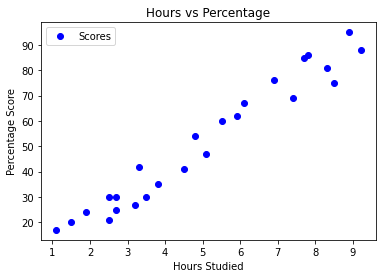

In [24]:
#Plotting the distraction of scores and number of hours studied on a 2D graph

student_data.plot(x='Hours',y='Scores',style='bo')
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

From the above graph it is clearly seen that there is a positive linear relation between hours and percentage which means that as the number of hours studied increased , the percentage scored also increased.

### Step 3: Prepare the Data

In [28]:
# we are extracting values of Hours Data into variable X and values of scores Data into variable Y

x = student_data.iloc[:, :-1].values
y = student_data.iloc[:, 1].values

In [29]:
#Numbers of Hours studied
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [30]:
#scores obtained
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [32]:
#we now split the data into train and test datasets using Scikit-Learn's built-in train_test_split()

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [33]:
x_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [35]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [36]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [37]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

### Step 4: Design and Train the Machine Learning Model

In [38]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train,y_train)

print("training complete")

training complete


### Step 5: Visualise the Model

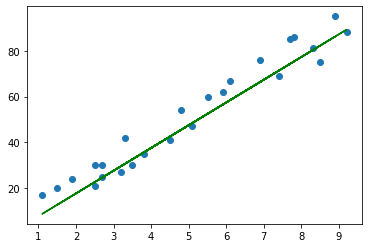

In [53]:
#Plotting the regression line 
line = regressor.coef_*x-regressor.intercept_

#Plotting for the test data
plt.scatter(x,y)
plt.plot(x,line,color="green")
plt.show()


### Step 6: Make Predictions

In [41]:
print(x_test)    # Testing data - in Hours
y_pred = regressor.predict(x_test)   # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [42]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual':y_test,'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [45]:
# Testing with custom data of 9.25 hrs/ day


hours = 9.25
own_predict=regressor.predict([[hours]])
print("No of Hours = ",{hours})
print("Predicted Score = ",{own_predict[0]})


No of Hours =  {9.25}
Predicted Score =  {93.69173248737538}


### Step 7: Evaluate the Model 

### Mean Absolute Error 

In [47]:
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002975


### Max Error 

In [50]:
print("Max Error:",metrics.max_error(y_test,y_pred))

Max Error: 6.732260779489842


### Mean Square Error

In [51]:
print("Mean Square Error:",metrics.mean_squared_error(y_test,y_pred))

Mean Square Error: 21.5987693072174
